In [83]:
# Import libraries:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

### Practical Exercise 4 (Normal distribution, mixture density)

In this exercise, you will learn how to model unknown joint probability distributions $p(x1,x2)$ in order to describe a given dataset. To this end, we will use Normal distributions with independent or dependent components.

As raw data, we use ```data/a.txt``` and ```data/b.txt```, containing $N_a=10.000$ and $N_b=30.000$ two-dimensional data points, respectively, which are stored in two columns. Originally, data set b was named x. Renamed that data set to avoid confusion with x-direction statistics (mean, variance).

#### Data set a.txt:

- Start modeling the data set a.mat with a Gaussian distribution with independent components.
- Visualize the data points and superimpose them with the contour image of the Gaussian. 
- Additionally generate a second figure with the 3D mesh of the estimated Gaussian. This mesh represents the joint probability $p(x1,x2)$ (we may also write $p(X)$ with $X=[x1,x2]^t$) in z-direction over the $(x1,x2)$ plane.
- Combine both images into a single figure using the subplot function. Does the distribution represent the data sufficiently good?
- Repeat the described procedure but this time using a Gaussian distribution with dependent components. Do you achieve a better modeling of the data?
- Combine all 4 images into a single overview figure with correct labeling of the axes and a reasonable title.

In [2]:
## Read txt file containing data set a.

# Note: The entries are not uniquely separated. Have only one blank for negative values and two blanks, else.
# Therefore, use one blank as separator, resulting in empty columns, that need to be removed afterwards.
a = pd.read_csv("../../data/sheet4/a.txt", sep=' ', header=None)

# Convert to numpy array:
a = np.array(a)

# Move negative entries to correct column:
a[:,4][np.isnan(a[:,4])] = a[:,3][np.isnan(a[:,4])]

# Keep only desired columns, stack and swap axes to end up with correct dimensions:
a = np.swapaxes(np.stack([a[:,2],a[:,4]]),0,1)

# Check dimensions:
print('dimensions of data set a:',a.shape)

dimensions of data set a: (10000, 2)


In [76]:
## Model data as 2D Gaussian with independent components.

# Get mean and standard deviations seperately for each dimension:
a_mean_x = np.mean(a[:,0])
a_mean_y = np.mean(a[:,1])
a_std_x = np.std(a[:,0])
a_std_y = np.std(a[:,1])

# Get min and max seperately for each dimension:
a_min_x = np.min(a[:,0])
a_min_y = np.min(a[:,1])
a_max_x = np.max(a[:,0])
a_max_y = np.max(a[:,1])

# Print result:
print('data set a:\n===========')
print('mean in x-direction:', np.round(a_mean_x,2))
print('mean in y-direction:', np.round(a_mean_y,2))
print('std. dev. in x-direction:', np.round(a_std_x,2))
print('std. dev. in y-direction:', np.round(a_std_y,2))

data set a:
mean in x-direction: 7.0
mean in y-direction: 4.3
std. dev. in x-direction: 1.74
std. dev. in y-direction: 1.23


In [143]:
# Create mesh grid with respect to given limits in x- and y-direction for samples in data set a:
x, y = np.mgrid[a_min_x:a_max_x:.01, a_min_y:a_max_y:.01]

# Compute corresponding univariate normal distributions:
x_normal_dist = 1 / np.sqrt(2 * np.pi * a_std_x**2) * np.exp(-((x-a_mean_x)**2) / (2 * a_std_x**2))
y_normal_dist = 1 / np.sqrt(2 * np.pi * a_std_y**2) * np.exp(-((y-a_mean_y)**2) / (2 * a_std_y**2))

# Compute joint probability density function as product of two independent distributions:
xy_normal_dist = x_normal_dist * y_normal_dist

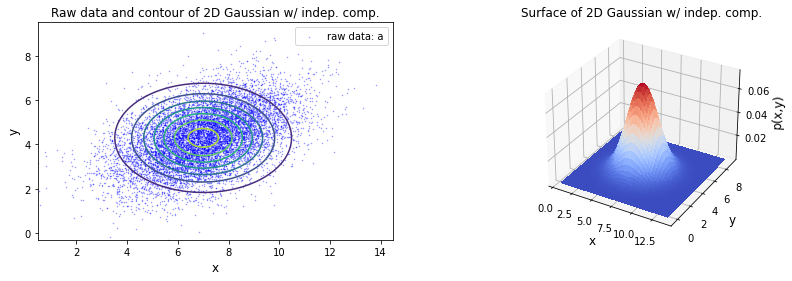

In [180]:
# Initialize plot:
fig = plt.figure(figsize=(14,4))

# Initialize first subplot:
ax1 = fig.add_subplot(121)

# Add scatterplot for raw data in data set a:
ax1.scatter(x=a[:,0], y=a[:,1], c='blue', marker='.', s=1, alpha=0.4, label='raw data: a')

# Add contour plot modelling the data as 2D Gaussian distribution with independent components:
ax1.contour(x, y, xy_normal_dist)

# Add title, label axes and add legend in first subplot:
ax1.set_title('Raw data and contour of 2D Gaussian w/ indep. comp.', fontsize=12)
ax1.set_xlabel('x', fontsize=12)
ax1.set_ylabel('y', fontsize=12)
ax1.legend()

# Initialize second subplot:
ax2 = fig.add_subplot(122, projection='3d')

# Add surface plot modelling the data as 2D Gaussian distribution with independent components:
ax2.plot_surface(x, y, xy_normal_dist, cmap='coolwarm', linewidth=0, antialiased=False)

# Add title, label axes and add legend in second subplot:
ax2.set_title('Surface of 2D Gaussian w/ indep. comp.', fontsize=12)
ax2.set_xlabel('x', fontsize=12)
ax2.set_ylabel('y', fontsize=12)
ax2.set_zlabel('p(x,y)', fontsize=12)

plt.show()

#### Discussion of modelling data in data set a as 2D Gaussian distribution with independent components

Modeling the data in data set **a** using a 2D Gaussian distribution with independent components is not a good choice. This type of distribution only works in case of statistically independent components, which is obviously violated in our case.

#### Data set b.txt:

- Start modeling the data set b.mat with a Gaussian distribution with dependent / independent components.
- Visualize the data points and superimpose them with the contour image of the Gaussian.
- Discuss the interim results.
- Ultimately, model this distribution with a mixture density and use k-means clustering (cf. lecture) to estimate the required parameters. How do you reasonably determine the number of required splits and iterations?
- Study the resulting contour images and discuss if the modeling has been improved.

In [12]:
## Read txt file containing data set b.

# Note: The entries are not uniquely separated. Have only one blank for negative values and two blanks, else.
# Therefore, use one blank as separator, resulting in empty columns, that need to be removed afterwards.
b = pd.read_csv("../../data/sheet4/b.txt", sep=' ', header=None)

# Convert to numpy array:
b = np.array(b)

# Move negative entries to correct column:
b[:,2][np.isnan(b[:,2])] = b[:,1][np.isnan(b[:,2])]
b[:,4][np.isnan(b[:,4])] = b[:,3][np.isnan(b[:,4])]

# Keep only desired columns, stack and swap axes to end up with correct dimensions:
b = np.swapaxes(np.stack([b[:,2],b[:,4]]),0,1)

# Check dimensions:
print('dimensions of data set b:',b.shape)

dimensions of data set b: (30000, 2)


In [14]:
## Model data as 2D Gaussian with independent components.

# Get mean and standard deviations seperately for each dimension:
b_mean_x = np.mean(b[:,0])
b_mean_y = np.mean(b[:,1])
b_std_x = np.std(b[:,0])
b_std_y = np.std(b[:,1])

# Get min and max seperately for each dimension:
b_min_x = np.min(b[:,0])
b_min_y = np.min(b[:,1])
b_max_x = np.max(b[:,0])
b_max_y = np.max(b[:,1])

# Print result:
print('data set b:\n===========')
print('mean in x-direction:', np.round(b_mean_x,2))
print('mean in y-direction:', np.round(b_mean_y,2))
print('std. dev. in x-direction:', np.round(b_std_x,2))
print('std. dev. in y-direction:', np.round(b_std_y,2))

data set b:
mean in x-direction: 5.0
mean in y-direction: 5.43
std. dev. in x-direction: 2.24
std. dev. in y-direction: 1.68


In [15]:
# Create mesh grid with respect to given limits in x- and y-direction for samples in data set b:
x, y = np.mgrid[b_min_x:b_max_x:.01, b_min_y:b_max_y:.01]

# Compute corresponding univariate normal distributions:
x_normal_dist = 1 / np.sqrt(2 * np.pi * b_std_x**2) * np.exp(-((x-b_mean_x)**2) / (2 * b_std_x**2))
y_normal_dist = 1 / np.sqrt(2 * np.pi * b_std_y**2) * np.exp(-((y-b_mean_y)**2) / (2 * b_std_y**2))

# Compute joint probability density function as product of two independent distributions:
xy_normal_dist = x_normal_dist * y_normal_dist

In [73]:
## For comparison: Model data set b by bivariate normal density with dependent variables.

# Initialize storage for bivariate normal density on mesh grid:
xy_normal_dist_dep = np.zeros(x.shape)

# Compose mean vector mu:
mu = np.array([[b_mean_x], [b_mean_y]])

# Compute covariance matrix:
cov = np.cov(b.T)

# Compute determinant of covariance matrix:
det = np.linalg.det(cov)

# Compute normalization factor:
norm_fac = 1 / np.sqrt((2*np.pi)**2 * det)

In [77]:
## Compute bivariate normal density on mesh grid coordinates (hence: all x,y-pairs):

# Loop over rows of mesh grid:
for i in range(x.shape[0]):
    
    # Loop over columns of mesh grid:
    for j in range(x.shape[1]):
        
        # Get current x,y-pair as column vector:
        xy = np.array([[x[i,j]], [y[i,j]]])
                
        # Get exponent:
        exponent = -0.5 * np.matmul((np.matmul((xy-mu).T, np.linalg.inv(cov))), (xy-mu))[0,0]
        
        # Compute bivariate normal density and store result:
        xy_normal_dist_dep[i,j] = norm_fac * np.exp(exponent)      

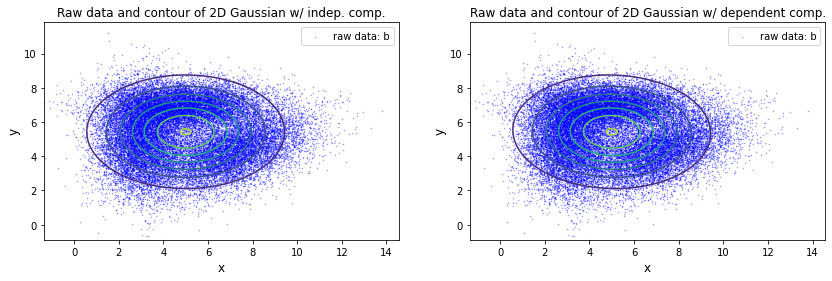

In [78]:
# Initialize plot:
fig = plt.figure(figsize=(14,4))

# Initialize first subplot:
ax1 = fig.add_subplot(121)

# Add scatterplot for raw data in data set b:
ax1.scatter(x=b[:,0], y=b[:,1], c='blue', marker='.', s=1, alpha=0.4, label='raw data: b')

# Add contour plot modelling the data as 2D Gaussian distribution with independent components:
ax1.contour(x, y, xy_normal_dist)

# Add title, label axes and add legend in first subplot:
ax1.set_title('Raw data and contour of 2D Gaussian w/ indep. comp.', fontsize=12)
ax1.set_xlabel('x', fontsize=12)
ax1.set_ylabel('y', fontsize=12)
ax1.legend()

# Initialize second subplot:
ax2 = fig.add_subplot(122)

# Add scatterplot for raw data in data set b:
ax2.scatter(x=b[:,0], y=b[:,1], c='blue', marker='.', s=1, alpha=0.4, label='raw data: b')

# Add contour plot modelling the data as 2D Gaussian distribution with independent components:
ax2.contour(x, y, xy_normal_dist_dep)

# Add title, label axes and add legend in first subplot:
ax2.set_title('Raw data and contour of 2D Gaussian w/ dependent comp.', fontsize=12)
ax2.set_xlabel('x', fontsize=12)
ax2.set_ylabel('y', fontsize=12)
ax2.legend()

plt.show()

#### Discussion of modelling data in data set b as 2D Gaussian distribution with independent and dependent components

Modeling the data in data set **b** using a 2D Gaussian distribution with independent components is not a good choice. Highest probability density is found in the middle of the point cloud, where the number of actual observations is low. 

Switching to a bivariate Gaussian distribution with dependent components leads to a similar result.

In [109]:
### Try k-means clustering: Use build-in sklearn functionality.

## Find the optimal number of clusters using, e.g., the ellbow method.
## Track the sum of squared distances (SSD) over the number of clusters.

# Initialize storage for SSD:
ssd = []

# Loop over number of clusters:
for k in range(2, 11):
    
    # Initialize clustering:
    kmeans_model = KMeans(n_clusters=k)
    
    # Apply model to data set b:
    kmeans_model.fit(b)
    
    # Store resulting SSD:
    ssd.append(kmeans_model.inertia_)
    

Text(0, 0.5, 'SSD for K')

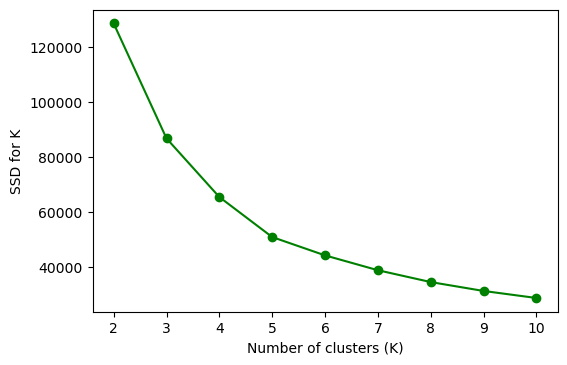

In [111]:
# Plot SSD over number of clusters:
plt.figure(figsize=(6, 4), dpi=100)
plt.plot(range(2, 11), ssd, color="green", marker="o")
plt.xlabel("Number of clusters (K)")
plt.ylabel("SSD for K")

In [127]:
## Looks like K=5 seems to be an appropriate number of clusters for data set b.
## Repeat clustering for K=5:

# Initialize clustering:
kmeans_model = KMeans(n_clusters=5)

# Apply model to data set b:
kmeans_model.fit(b)

KMeans(n_clusters=5)

In [128]:
# Get cluster centers:
kmeans_model.cluster_centers_

array([[2.95003979, 6.63968746],
       [6.31731827, 3.68534584],
       [8.60875331, 5.41412182],
       [3.02963393, 3.77239044],
       [5.6636562 , 6.96061338]])

In [129]:
# Get labels:
kmeans_model.labels_

array([2, 3, 2, ..., 0, 4, 0], dtype=int32)

In [130]:
## Convert labels into colors for visualizing the result:

# Set desired color labels:
color_labels = ['black', 'blue', 'red', 'green', 'purple']

# Initialize storage for colors:
colors = []

# Loop over kmeans labels:
for i in range(len(kmeans_model.labels_)):
    
    # Loop over color labels:
    for c in range(len(color_labels)):
        
        # Match current label to color number:
        if kmeans_model.labels_[i] == c:
            
            # Append color label:
            colors.append(color_labels[c])
            
# convert colors to numpy array:
colors = np.array(colors)

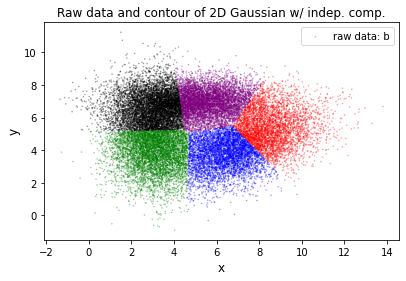

In [131]:
## Visualize cluster results:

# Initialize plot:
fig = plt.figure(figsize=(14,4))

# Initialize first subplot:
ax1 = fig.add_subplot(121)

# Add scatterplot for raw data in data set b:
ax1.scatter(x=b[:,0], y=b[:,1], c=colors, marker='.', s=1, alpha=0.4, label='raw data: b')

# Add title, label axes and add legend:
ax1.set_title('Raw data and contour of 2D Gaussian w/ indep. comp.', fontsize=12)
ax1.set_xlabel('x', fontsize=12)
ax1.set_ylabel('y', fontsize=12)
ax1.legend()


plt.show()